In [7]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
learning_rate = 0.01
training_epoch = 1000

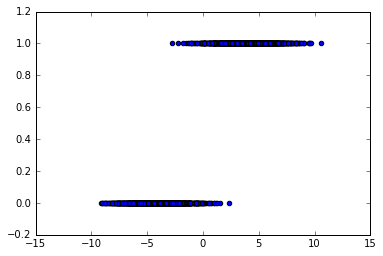

In [8]:
np.random.seed(23)
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))
plt.scatter(xs, ys)

In [9]:
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
w = tf.Variable([0., 0.], name="parameters")
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epoch):
        loss, _ = sess.run([cost, train_op], {X:xs, Y:ys})
        if epoch % 100 == 0:
            print(epoch, loss)
        if abs(prev_err - loss) < 0.0001:
            break
        prev_err = loss
    w_val = sess.run(w, {X:xs, Y:ys})

0 0.693146
100 0.139648
200 0.103784


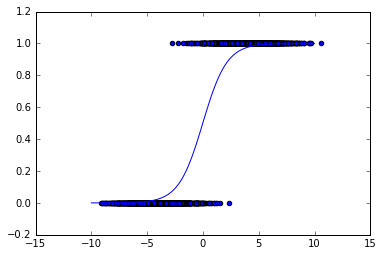

In [11]:
all_xs = np.linspace(-10, 10, 100)
with tf.Session() as sess:
    predicted_vals = sess.run(tf.sigmoid(all_xs * w_val[1] + w_val[0]))
plt.plot(all_xs, predicted_vals)
plt.scatter(xs, ys)
plt.show()